## Keras -- MLPs on MNIST

In [1]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

Using TensorFlow backend.


In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [3]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [5]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [6]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [7]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [8]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [10]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


<h2> 1st Model  784->310->150->10  </h2>

In [35]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

model_1 = Sequential()

model_1.add(Dense(310, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_1.add(BatchNormalization())
model_1.add(Dropout(0.5))

model_1.add(Dense(150, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_1.add(BatchNormalization())
model_1.add(Dropout(0.5))

model_1.add(Dense(output_dim, activation='softmax'))


model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 310)               243350    
_________________________________________________________________
batch_normalization_14 (Batc (None, 310)               1240      
_________________________________________________________________
dropout_14 (Dropout)         (None, 310)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 150)               46650     
_________________________________________________________________
batch_normalization_15 (Batc (None, 150)               600       
_________________________________________________________________
dropout_15 (Dropout)         (None, 150)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 10)                1510      
Total para

In [36]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 157us/step - loss: 0.5351 - acc: 0.8369 - val_loss: 0.1795 - val_acc: 0.9431
Epoch 2/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.2773 - acc: 0.9176 - val_loss: 0.1344 - val_acc: 0.9582
Epoch 3/20
60000/60000 [==============================] - 7s 119us/step - loss: 0.2184 - acc: 0.9344 - val_loss: 0.1180 - val_acc: 0.9626
Epoch 4/20
60000/60000 [==============================] - 7s 117us/step - loss: 0.1942 - acc: 0.9419 - val_loss: 0.1052 - val_acc: 0.9669
Epoch 5/20
60000/60000 [==============================] - 7s 116us/step - loss: 0.1769 - acc: 0.9471 - val_loss: 0.0982 - val_acc: 0.9693
Epoch 6/20
60000/60000 [==============================] - 7s 118us/step - loss: 0.1612 - acc: 0.9515 - val_loss: 0.0936 - val_acc: 0.9703
Epoch 7/20
60000/60000 [==============================] - 7s 118us/step - loss: 0.1470 - acc: 0.9550 - val_loss: 0.0876 - 

Test score: 0.06840268510318129
Test accuracy: 0.979


<IPython.core.display.Javascript object>


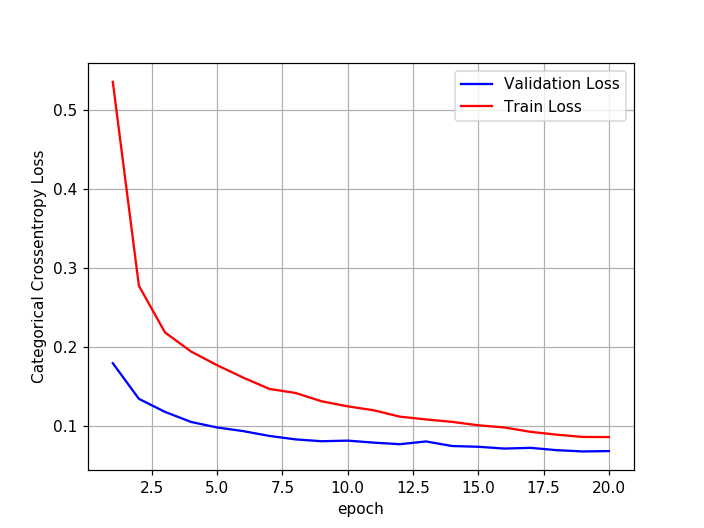

In [37]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> 2nd Model  784->500->300->200->10  </h2>

In [32]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

model_2= Sequential()

model_2.add(Dense(500, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.5))

model_2.add(Dense(300, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_2.add(BatchNormalization())
model_2.add(Dropout(0.5))

model_2.add(Dense(200, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_2.add(BatchNormalization())
model_2.add(Dropout(0.5))

model_2.add(Dense(output_dim, activation='softmax'))


model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 500)               392500    
_________________________________________________________________
batch_normalization_11 (Batc (None, 500)               2000      
_________________________________________________________________
dropout_11 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 300)               150300    
_________________________________________________________________
batch_normalization_12 (Batc (None, 300)               1200      
_________________________________________________________________
dropout_12 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 200)               60200     
__________

In [33]:
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 211us/step - loss: 0.7186 - acc: 0.7772 - val_loss: 0.2066 - val_acc: 0.9375
Epoch 2/20
60000/60000 [==============================] - 11s 176us/step - loss: 0.3307 - acc: 0.9004 - val_loss: 0.1579 - val_acc: 0.9505
Epoch 3/20
60000/60000 [==============================] - 11s 177us/step - loss: 0.2569 - acc: 0.9229 - val_loss: 0.1313 - val_acc: 0.9586
Epoch 4/20
60000/60000 [==============================] - 11s 181us/step - loss: 0.2187 - acc: 0.9359 - val_loss: 0.1115 - val_acc: 0.9658
Epoch 5/20
60000/60000 [==============================] - 11s 179us/step - loss: 0.1887 - acc: 0.9450 - val_loss: 0.1035 - val_acc: 0.9680
Epoch 6/20
60000/60000 [==============================] - 11s 179us/step - loss: 0.1712 - acc: 0.9493 - val_loss: 0.0910 - val_acc: 0.9715
Epoch 7/20
60000/60000 [==============================] - 11s 177us/step - loss: 0.1583 - acc: 0.9534 - val_loss: 0.

Test score: 0.06794361313983682
Test accuracy: 0.981


<IPython.core.display.Javascript object>


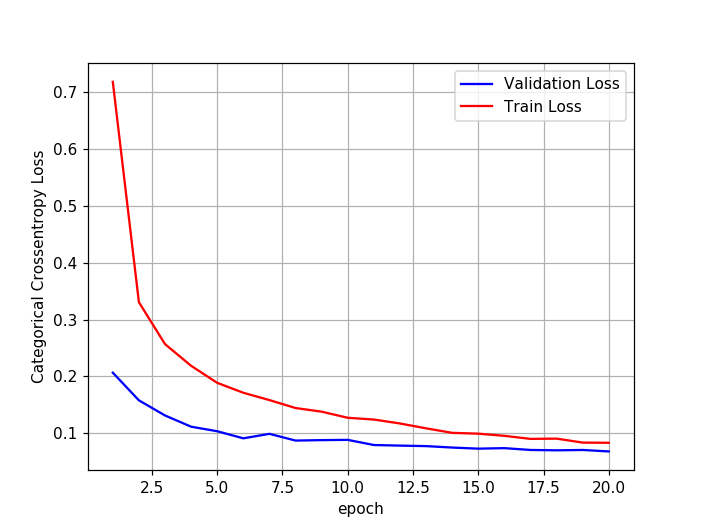

In [34]:
score = model_2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> 3rd Model  784->500->400->200->300->120->10  </h2>

In [38]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

model_3= Sequential()

model_3.add(Dense(500, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.5))

model_3.add(Dense(400, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_3.add(BatchNormalization())
model_3.add(Dropout(0.5))

model_3.add(Dense(200, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_3.add(BatchNormalization())
model_3.add(Dropout(0.5))

model_3.add(Dense(300, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_3.add(BatchNormalization())
model_3.add(Dropout(0.5))

model_3.add(Dense(120, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_3.add(BatchNormalization())
model_3.add(Dropout(0.5))

model_3.add(Dense(output_dim, activation='softmax'))


model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 500)               392500    
_________________________________________________________________
batch_normalization_16 (Batc (None, 500)               2000      
_________________________________________________________________
dropout_16 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 400)               200400    
_________________________________________________________________
batch_normalization_17 (Batc (None, 400)               1600      
_________________________________________________________________
dropout_17 (Dropout)         (None, 400)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 200)               80200     
__________

In [39]:
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_3.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 18s 299us/step - loss: 1.7109 - acc: 0.4512 - val_loss: 0.4496 - val_acc: 0.8801
Epoch 2/20
60000/60000 [==============================] - 15s 248us/step - loss: 0.6688 - acc: 0.7876 - val_loss: 0.2676 - val_acc: 0.9238
Epoch 3/20
60000/60000 [==============================] - 15s 247us/step - loss: 0.4662 - acc: 0.8597 - val_loss: 0.2059 - val_acc: 0.9383
Epoch 4/20
60000/60000 [==============================] - 15s 256us/step - loss: 0.3681 - acc: 0.8932 - val_loss: 0.1774 - val_acc: 0.9477
Epoch 5/20
60000/60000 [==============================] - 15s 250us/step - loss: 0.3090 - acc: 0.9124 - val_loss: 0.1504 - val_acc: 0.9571
Epoch 6/20
60000/60000 [==============================] - 15s 251us/step - loss: 0.2631 - acc: 0.9256 - val_loss: 0.1384 - val_acc: 0.9621
Epoch 7/20
60000/60000 [==============================] - 15s 255us/step - loss: 0.2423 - acc: 0.9315 - val_loss: 0.

Test score: 0.08802014297826681
Test accuracy: 0.9769


<IPython.core.display.Javascript object>


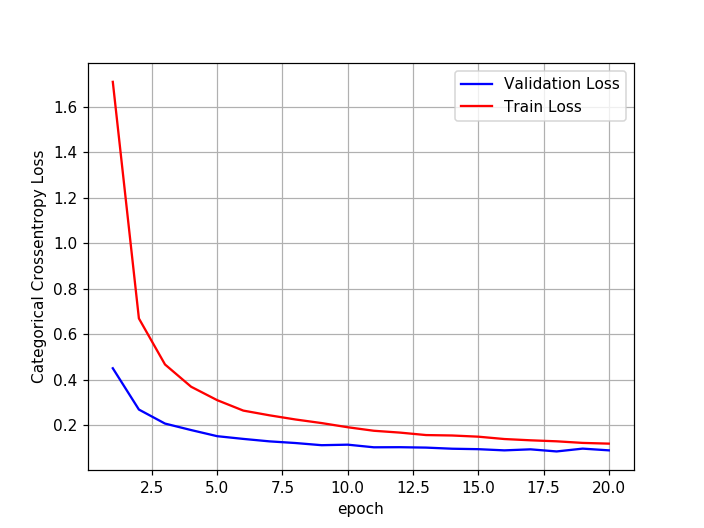

In [40]:
score = model_3.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [42]:
from prettytable import PrettyTable  
table = PrettyTable()

table.field_names = ["Model",  "Layer info","Accuracy"]

table.add_row(["Model 1st",  "784->310->150->10","0.979" ])
table.add_row(["Model 2nd", "784->500->300->200->10","0.981"])
table.add_row(["Model 3rd",  "784->500->400->200->300->120->10","0.976" ])
print(table)

+-----------+----------------------------------+----------+
|   Model   |            Layer info            | Accuracy |
+-----------+----------------------------------+----------+
| Model 1st |        784->310->150->10         |  0.979   |
| Model 2nd |      784->500->300->200->10      |  0.981   |
| Model 3rd | 784->500->400->200->300->120->10 |  0.976   |
+-----------+----------------------------------+----------+
